# Twitter Data

The dataset used is "Sentiment140" which can be accessed at the following link"
> https://www.kaggle.com/kazanova/sentiment140



## Imports

In [26]:
import pandas as pd
import numpy as np
import string
import re

## Load Data

Labels for our columns were given at its Kaggle repository

In [34]:
COL_LABELS = ['Target', 'Id', 'Date', 'Flag', 'User', 'Text']
DATASET_ENC = 'latin-1'

In [35]:
# Loading our sentiment140 dataset
df = pd.read_csv("1.6m_tweets.csv", encoding = DATASET_ENC, names = COL_LABELS, usecols = [0, 5])

## Examining our Data

In [36]:
df

,Target,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [30]:
print(df['Text'][1599995])
print(df['Target'][1599995])

print(df['Text'][0])
print(df['Target'][0])

Just woke up. Having no school is the best feeling ever 
4
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
0


### Checking whether our data has any unlabelled entry and how many unique values are there for our sentiment analysis

In [18]:
# Setting score of 4 to 1.
df['Target'] = df['Target'].replace(4, 1)

In [31]:
print(f'Number of unlabelled entries in our data: {np.sum(df.isnull().any(axis=1))}')
print(f'Number of unqiue targets(scores) for our text data: {df["Target"].nunique()}')

Number of unlabelled entries in our data: 0
Number of unqiue targets(scores) for our text data: 2


<Axes: xlabel='Target', ylabel='count'>

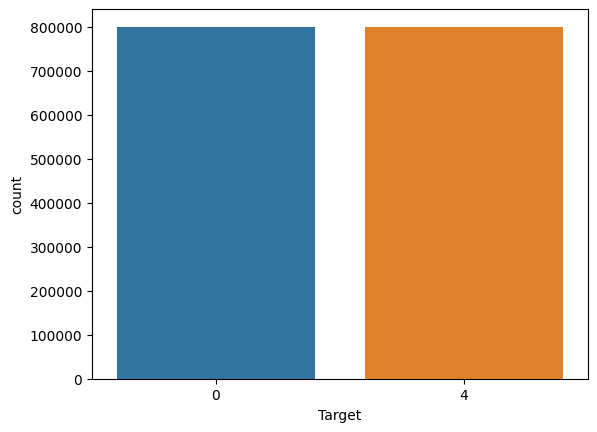

In [37]:
import seaborn as sns
sns.countplot(x='Target', data=df)

#### Conclusion
- There are no empty sets
- Only two sentiments are present: Positive and Negative
- Our data is evenly distributed

## Data Pre-processing
After viewing that data, the following steps need to be performed:

- Remove links
- Remove tags(@MIKe)
- Removing numbers (Happy 13th birthday -> Happy birthday)
- Remove emojis(Not yet)


In [38]:
df

,Target,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


### Create cleansing functions

In [39]:
def cleaning_URLs(data):
    return re.sub(r'((www.\S+)|(https?://\S+))',r' ',data)

def cleaning_numbers(data):
    return re.sub(r'[0-9]\S+', r'', data)

def cleaning_tags(data):
    return re.sub(r'(@\S+) | (#\S+)', r'', data)

def cleaning_punctuations(text):
    punctuations_list = string.punctuation
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

### Operation 'Begone'

In [40]:
df['Text'] = df['Text'].apply(lambda x: cleaning_URLs(x))
df['Text'] = df['Text'].apply(lambda x: cleaning_numbers(x))
df['Text'] = df['Text'].apply(lambda x: cleaning_tags(x))
df['Text'] = df['Text'].apply(lambda x: cleaning_punctuations(x))

In [41]:
df

,Target,Text
0,0,Awww thats a bummer You shoulda got David ...
1,0,is upset that he cant update his Facebook by t...
2,0,I dived many times for the ball Managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no its not behaving at all im mad why am i her...
...,...,...
1599995,4,Just woke up Having no school is the best feel...
1599996,4,TheWDBcom Very cool to hear old Walt intervie...
1599997,4,Are you ready for your MoJo Makeover Ask me fo...
1599998,4,Happy Birthday to my boo of alll time Tupac A...


## Saving our data

In [42]:
df.to_json('curated_data.json', orient='records', lines=True)